In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [2]:
data = pd.read_csv('Earthquate_Damage.csv') 
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [3]:
def data_explanation(data, name):
    """
    create a txt file that contains the explanation of the data
    """
    
    with open(f'./data_description_{name}.txt','w') as f:
        for i in data.columns:
            f.write(f'Feature Name: {i} \n')
            f.write(f'# of data: {len(data[i])} \n')
            f.write(f'# of unique data: {len(data[i].unique())} \n')
            f.write(f'unique datas: {data[i].unique()} \n\n')
    f.close()
    
data_explanation(data, 'earthquake')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Data Description file 참조 결과,

- building ID는 unique data 개수가 총 데이터 수와 같아, 제거 되어야함. Unnecessary Identifiers

- info() function 결과를 보면 모든 columnn에 null 값이 없음을 볼 수 있음.

[1] 입력 변수의 속성이 numeric 이 아닌 변수들에 대해 1-of-C coding (1-hot encoding) 방식을 통해 
명목형(요인형) 변수를 범주의 개수만큼의 이진형(binary)  변수들로 구성되는 dummy  variable  을 
생성하시오.

In [5]:
features = data.drop(['building_id','damage_grade'], axis = 1)
target = data['damage_grade']

In [6]:
#Object type features list
OHE_features = list(features.select_dtypes(include = ['object']).columns)
len(OHE_features)

8

In [7]:
OHE_features

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [8]:
# one hot encoding
OHE = OneHotEncoder(drop='first')
One_hot_encoded = OHE.fit_transform(features[OHE_features])
One_hot_encoded_dt = pd.DataFrame(One_hot_encoded.toarray(), columns = OHE.get_feature_names_out(OHE_features))

features = features.drop(OHE_features, axis = 1)
features = pd.concat([features, One_hot_encoded_dt], axis = 1)

features.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8,900,2812,2,10,8,7,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,21,363,8973,2,10,5,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,22,418,10694,2,10,6,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11,131,1488,3,30,8,9,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# scale the numerical features   
numerical_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(features[numerical_columns])
scaled_numerical = pd.DataFrame(scaled_numerical, columns = numerical_columns)

features = features.drop(numerical_columns, axis = 1)
features = pd.concat([scaled_numerical, features], axis = 1)

features.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,0.038365,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,0.038365,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,0.038365,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,0.038365,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,0.038365,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


[2] 전체 데이터셋을 임의로 150,000 개의 빌딩이 포함된 Training dataset 과 50,000 개의 Validation 
dataset, 그리고 60,601 개의 Test dataset 으로 구분한 뒤 다음 각 물음에 답하시오. 분류 성능을 
평가/비교할 때는 3-class classification 의 Accuracy 와 Balanced Correction Rate (BCR)을 이용하시오.

In [10]:
# train test split
X_train_L, X_test, y_train_L, y_test = train_test_split(features, target, test_size = 60601, random_state = 42)
# train valid split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_L, y_train_L, test_size = 50000, random_state = 42)

print(len(X_train), len(X_valid), len(X_test))

150000 50000 60601


In [11]:
# performance evaluation function
from sklearn.metrics import confusion_matrix

def perf_eval_fc(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    #cm 3x3 matrix
    accuracy = np.trace(cm) / np.sum(cm)
    BCR = np.cbrt(cm[0,0]/np.sum(cm[0,:]) * cm[1,1]/np.sum(cm[1,:]) * cm[2,2]/np.sum(cm[2,:]))
    return accuracy, BCR
    
    
perf_table = pd.DataFrame(columns = ['Accuracy', 'BCR'])
perf_table
    

,Accuracy,BCR


# Parameters Setting

[Q1] 다음과 같이 세 가지 단일 모형에 대하여 분류 모델을 구축하고 Accuracy 와 BCR 관점에서 분류 
정확도를 비교해보시오. CART 와 ANN 의 경우 hyperparameter 후보 값들을 명시하고 Validation 
dataset 을 통해서 최적의 값을 찾아서 Test 에 사용하시오.

- logistic regression과 prepruning의 경우에는 train_L 사용하였음.

## Multinomial Logistic Regression

In [12]:
#import multinomial logistic regression
from sklearn.linear_model import LogisticRegression
import pickle

try:
    #load the model
    logreg = pickle.load(open('logreg_model.sav', 'rb'))
except:
    #train the model
    logreg = LogisticRegression(solver='sag', max_iter=1000, 
                                multi_class='multinomial', random_state=42, verbose=1)

    logreg.fit(X_train_L, y_train_L)

    #save the model

    pickle.dump(logreg, open('logreg_model.sav', 'wb'))

#predict the test set
y_pred = logreg.predict(X_test)

#performance evaluation
perf_table.loc['Logistic Regression'] = perf_eval_fc(y_pred, y_test)
perf_table


,Accuracy,BCR
Logistic Regression,0.588786,0.372573


## Classification and Regression Tree (CART) 

In [13]:
tree_perf_table = pd.DataFrame(columns = ['Accuracy', 'BCR'])

In [14]:
from sklearn.tree import DecisionTreeClassifier

try:
    #load the model
    full_tree = pickle.load(open('full_tree_model.sav', 'rb'))
    
except:
    full_tree = DecisionTreeClassifier(random_state=42)
    full_tree.fit(X_train, y_train)
    
    #save the model
    pickle.dump(full_tree, open('full_tree_model.sav','wb'))

y_pred = full_tree.predict(X_test)
tree_perf_table.loc['Full Tree'] = perf_eval_fc(y_pred, y_test)

tree_perf_table

,Accuracy,BCR
Full Tree,0.700186,0.628265


- Post pruning 을 시도해 보았지만 예상시간이 11시간이 넘어가서, 불가능했다.

In [15]:
from sklearn.model_selection import GridSearchCV

try:
    #load the model
    best_pre_pruning = pickle.load(open('best_pre_pruning_model.sav', 'rb'))
    
except:
    # Pre Pruning parameters
    pre_pruning_hyperparameters = {
        'max_depth': [2, 4, 8, 16, 32],
        'min_samples_split': [2, 4, 8, 16, 32],
    }  

    # choosing the best hyperparameters using 5-fold cross validation
    pre_pruning = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                scoring='balanced_accuracy',
                                param_grid=pre_pruning_hyperparameters,
                                cv=5,
                                verbose=1,
                                n_jobs=-1)

    pre_pruning.fit(X_train_L, y_train_L)

    best_pre_pruning = pre_pruning.best_estimator_
    
    #save model
    pickle.dump(best_pre_pruning, open('best_pre_pruning_model.sav', 'wb'))
    
    
tree_perf_table.loc['Pre Pruning'] = perf_eval_fc(best_pre_pruning.predict(X_test), y_test)


In [16]:
if tree_perf_table.loc['Pre Pruning', 'BCR'] > tree_perf_table.loc['Full Tree', 'BCR']:
    full_tree = best_pre_pruning
    pickle.dump(full_tree, open('full_tree_model.sav','wb'))
    print('Full tree model is updated')
else:
    print('Full tree model is not updated')

perf_table.loc['CART'] = perf_eval_fc(best_pre_pruning.predict(X_test), y_test)

Full tree model is not updated


In [17]:
best_pre_pruning.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 32,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 32,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

## Artificial Neural Network (ANN) 

In [18]:
neural_network_hyperparameters = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'Batch_size': 256,
}

from sklearn.neural_network import MLPClassifier

try:
    #load the model
    best_nn = pickle.load(open('best_nn_model.sav', 'rb'))

except:
    nn1 = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100,), batch_size=256)
    nn1.fit(X_train, y_train)
    
    nn2 = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 100), batch_size=256)
    nn2.fit(X_train, y_train)
    
    nn3 = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 100, 100), batch_size=256)
    nn3.fit(X_train, y_train)
    
    _, nn1_BCR = perf_eval_fc(nn1.predict(X_valid), y_valid)
    best_nn = nn1
    best_BCR = nn1_BCR
    _, nn2_BCR = perf_eval_fc(nn2.predict(X_valid), y_valid)
    if nn2_BCR > nn1_BCR:
        best_nn = nn2
        best_BCR = nn2_BCR
    _, nn3_BCR = perf_eval_fc(nn3.predict(X_valid), y_valid)
    if nn3_BCR > best_BCR:
        best_nn = nn3
        best_BCR = nn3_BCR
    best_hidden_layer_sizes = best_nn.get_params()['hidden_layer_sizes']
    print('Best hidden layer sizes:', best_hidden_layer_sizes)
    
    best_nn = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=best_hidden_layer_sizes, batch_size=256)
    best_nn.fit(X_train_L, y_train_L)
    #save model
    pickle.dump(best_nn, open('best_nn_model.sav', 'wb'))
    
    
perf_table.loc['ANN'] = perf_eval_fc(best_nn.predict(X_test), y_test)

perf_table

,Accuracy,BCR
Logistic Regression,0.588786,0.372573
CART,0.700186,0.628265
ANN,0.679626,0.536371


In [19]:
#best parameters
best_depth = best_pre_pruning.get_params()['max_depth']
best_min_samples_split = best_pre_pruning.get_params()['min_samples_split']

best_hidden_layer_sizes = best_nn.get_params()['hidden_layer_sizes']

In [20]:
print('Best depth: ', best_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best hidden_layer_sizes: ', best_hidden_layer_sizes)

Best depth:  32
Best min_samples_split:  32
Best hidden_layer_sizes:  (100, 100)


# Ensemble Learning

[Q2] CART 의 Bagging 모델을 Bootstrap 의 수를 30 부터 30 단위로 300 까지 증가시키면서 분류 정확도를 
평가해보시오. 최적의 Bootstrap 수는 몇으로 확인되는가? 이 모델은 단일 모형과 비교했을 때 성능의 
향상이 있는가?

## Bagging (CART)

In [21]:
# Bagging Training
from sklearn.ensemble import BaggingClassifier

try:
    #load the model
    bagging = pickle.load(open('bagging_CART_model.sav', 'rb'))
    #Load the bootstrap
    bagging_bootstrap = pd.read_csv('bagging_CART_bootstrap.csv', index_col=0)

except:
    best_bagging_BCR = 0
    bagging_bootstrap = []
    for n_bootstrap in range(30, 301, 30):
        bagging = BaggingClassifier(base_estimator=best_pre_pruning, 
                                    n_estimators=n_bootstrap, random_state=42,
                                    bootstrap=True,n_jobs=-1,
                                    verbose=1)
        bagging.fit(X_train, y_train)
        
        _, bagging_BCR = perf_eval_fc(bagging.predict(X_valid), y_valid)
        bagging_bootstrap.append(bagging_BCR)
        
        if  bagging_BCR >= best_bagging_BCR:
            best_bagging = bagging
            best_bagging_BCR = bagging_BCR
            best_bagging_Bootstrap = n_bootstrap
            
    bagging = BaggingClassifier(base_estimator=best_pre_pruning,
                                n_estimators=best_bagging_Bootstrap, random_state=42,
                                bootstrap=True,n_jobs=-1,
                                verbose=1)
    
    bagging.fit(X_train_L, y_train_L)
    
    #save model
    pickle.dump(bagging, open('bagging_CART_model.sav', 'wb'))
    #save dataframe
    pd.DataFrame(bagging_bootstrap).to_csv('bagging_CART_bootstrap.csv', index=False)
    
    
perf_table.loc['Bagging'] = perf_eval_fc(bagging.predict(X_test), y_test)

# best bootstrap
best_bagging_Bootstrap = bagging.get_params()['n_estimators']
print('Best bootstrap: ', best_bagging_Bootstrap)

perf_table


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   10.0s remaining:   30.3s


Best bootstrap:  210


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   11.6s finished


,Accuracy,BCR
Logistic Regression,0.588786,0.372573
CART,0.700186,0.628265
ANN,0.679626,0.536371
Bagging,0.738833,0.629297


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

try:
    #load the model
    random_forest = pickle.load(open('random_forest_model.sav', 'rb'))
    #Load the bootstrap
    RF_bootstrap = pd.read_csv('random_forest_bootstrap.csv', index_col=0)

except:
    best_RF_BCR = 0
    RF_bootstrap = []
    for n_bootstrap in range(30, 301, 30):
        random_f = RandomForestClassifier(n_estimators=n_bootstrap,
                                          max_depth=best_depth,
                                          min_samples_split=best_min_samples_split,
                                          random_state=42, n_jobs=-1, verbose=1)
        random_f.fit(X_train, y_train)
        
        _, random_f_BCR = perf_eval_fc(random_f.predict(X_valid), y_valid)
        RF_bootstrap.append(random_f_BCR)
        if  random_f_BCR >= best_RF_BCR:
            best_RF = random_f
            best_RF_BCR = random_f_BCR
            best_RF_Bootstrap = n_bootstrap
            
    random_forest = RandomForestClassifier(n_estimators=best_RF_Bootstrap,
                                             max_depth=best_depth,
                                                min_samples_split=best_min_samples_split,
                                                random_state=42, n_jobs=-1, verbose=1)
    
    random_forest.fit(X_train_L, y_train_L)
    #save model
    pickle.dump(random_forest, open('random_forest_model.sav', 'wb'))
    #save dataframe
    pd.DataFrame(RF_bootstrap).to_csv('random_forest_bootstrap.csv', index=False)

perf_table.loc['Random Forest'] = perf_eval_fc(random_forest.predict(X_test), y_test)

# best bootstrap
best_RF_Bootstrap = random_forest.get_params()['n_estimators']
print('Best bootstrap: ', best_RF_Bootstrap)

perf_table

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s


Best bootstrap:  270


[Parallel(n_jobs=8)]: Done 270 out of 270 | elapsed:    1.4s finished


,Accuracy,BCR
Logistic Regression,0.588786,0.372573
CART,0.700186,0.628265
ANN,0.679626,0.536371
Bagging,0.738833,0.629297
Random Forest,0.715054,0.569250


In [23]:
RF_var_imp = random_forest.feature_importances_

RF_var_imp_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': RF_var_imp})

RF_var_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

RF_var_imp_df

,Variable,Importance
0,geo_level_1_id,0.238646
1,geo_level_2_id,0.117843
2,geo_level_3_id,0.088225
4,age,0.053919
5,area_percentage,0.050086
6,height_percentage,0.041329
33,foundation_type_r,0.037566
9,has_superstructure_mud_mortar_stone,0.029354
3,count_floors_pre_eq,0.026938
39,ground_floor_type_v,0.025638


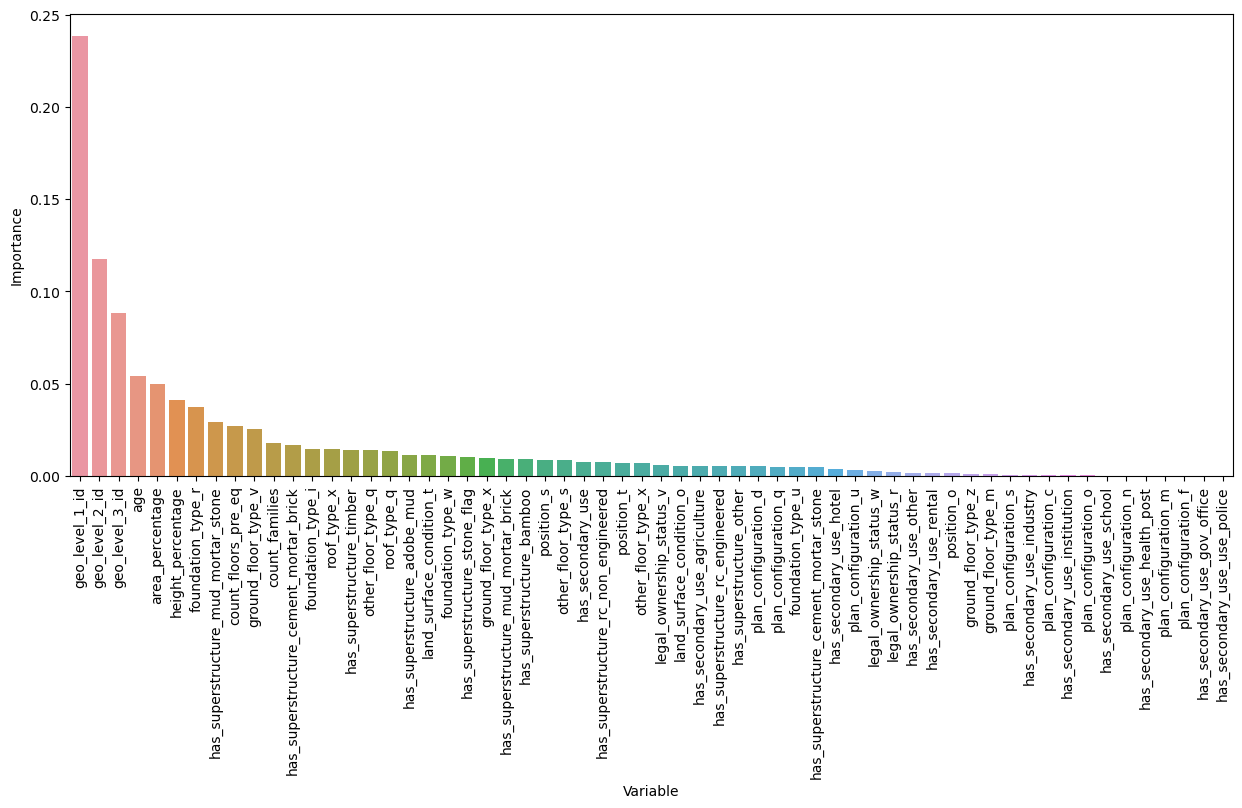

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(x='Variable', y='Importance', data=RF_var_imp_df)
plt.xticks(rotation=90)
plt.show()

## ANN 30

[Q4] [Q1]에서 찾은 최적의 hyperparameter 를 이용하여 ANN 단일모형을 30 번 반복하여 테스트 정확도를 
평가해보시오. Accuracy 와 BCR 의 평균 및 표준편차를 기록하시오.

In [27]:
try:
    #load mean, std
    mean_std_ACC_BCR = pd.read_csv('mean_std_ACC_BCR.csv', index_col=0)
    mean_ANN_accuracy = mean_std_ACC_BCR.loc['ANN', 'mean_accuracy']
    std_ANN_accuracy = mean_std_ACC_BCR.loc['ANN', 'std_accuracy']
    mean_ANN_BCR = mean_std_ACC_BCR.loc['ANN', 'mean_BCR']
    std_ANN_BCR = mean_std_ACC_BCR.loc['ANN', 'std_BCR']
    
except:
    ANN_accuracy = []
    ANN_BCR = []
    for i in range(30):
        # random state를 i로 설정해, 각각의 ANN 모델이 다른 결과를 출력하도록 설정
        ANN = MLPClassifier(random_state=i, max_iter=1000, hidden_layer_sizes=best_hidden_layer_sizes, batch_size=256, verbose=1)
        ANN.fit(X_train_L, y_train_L)
        y_pred = ANN.predict(X_test)
        accuracy, BCR = perf_eval_fc(y_pred, y_test)
        ANN_accuracy.append(accuracy)
        ANN_BCR.append(BCR)
        
    ANN_accuracy = np.array(ANN_accuracy)
    ANN_BCR = np.array(ANN_BCR)

    mean_ANN_accuracy = np.mean(ANN_accuracy)
    std_ANN_accuracy = np.std(ANN_accuracy)

    mean_ANN_BCR = np.mean(ANN_BCR)
    std_ANN_BCR = np.std(ANN_BCR)
    #save dataframe
    mean_std_ACC_BCR = pd.DataFrame({'mean_accuracy': [mean_ANN_accuracy], 'std_accuracy': [std_ANN_accuracy],
                                        'mean_BCR': [mean_ANN_BCR], 'std_BCR': [std_ANN_BCR]}, index=['ANN'])
    mean_std_ACC_BCR.to_csv('mean_std_ACC_BCR.csv')
    
mean_ANN_accuracy, std_ANN_accuracy, mean_ANN_BCR, std_ANN_BCR = round(mean_ANN_accuracy, 6), round(std_ANN_accuracy, 6), round(mean_ANN_BCR, 6), round(std_ANN_BCR, 6)
perf_table.loc['ANN_30']=[f'{mean_ANN_accuracy}({std_ANN_accuracy})', f'{mean_ANN_BCR}({std_ANN_BCR})']

perf_table

,Accuracy,BCR
Logistic Regression,0.588786,0.372573
CART,0.700186,0.628265
ANN,0.679626,0.536371
Bagging,0.738833,0.629297
Random Forest,0.715054,0.56925
ANN_30,0.678604(0.003255),0.578173(0.014465)


## ANN Bagging

In [29]:
from tqdm import tqdm

try:
    # Load the bootstrap
    ANN_bagging_bootstrap = pd.read_csv('ANN_bagging_bootstrap.csv', index_col=0)

except:
    Bagging_ANN_mean_ACC = []
    Bagging_ANN_mean_BCR = []
    Bagging_ANN_std_ACC = []
    Bagging_ANN_std_BCR = []

    bootstrap_range = range(30, 301, 30)
    with tqdm(total=len(bootstrap_range) * 30) as pbar:
        for n_bootstrap in bootstrap_range:
            ANN_bagging_ACC_list = []
            ANN_bagging_BCR_list = []
            for i in range(30):
                ANN_bagging_temp = BaggingClassifier(base_estimator=best_nn,
                                                    n_estimators=n_bootstrap,
                                                    random_state=i,
                                                    bootstrap=True,
                                                    n_jobs=-1,
                                                    verbose=1)
                ANN_bagging_temp.fit(X_train_L, y_train_L)

                ANN_bagging_Accuracy, ANN_bagging_BCR = perf_eval_fc(ANN_bagging_temp.predict(X_test), y_test)
                ANN_bagging_ACC_list.append(ANN_bagging_Accuracy)
                ANN_bagging_BCR_list.append(ANN_bagging_BCR)
                pbar.update(1)

            Bagging_ANN_mean_ACC.append(np.mean(ANN_bagging_ACC_list))
            Bagging_ANN_std_ACC.append(np.std(ANN_bagging_ACC_list))
            Bagging_ANN_mean_BCR.append(np.mean(ANN_bagging_BCR_list))
            Bagging_ANN_std_BCR.append(np.std(ANN_bagging_BCR_list))

    ANN_bagging_bootstrap = pd.DataFrame({'n_bootstrap': range(30, 301, 30),
                                          'mean_accuracy': Bagging_ANN_mean_ACC,
                                          'std_accuracy': Bagging_ANN_std_ACC,
                                          'mean_BCR': Bagging_ANN_mean_BCR,
                                          'std_BCR': Bagging_ANN_std_BCR})
    # Save dataframe
    ANN_bagging_bootstrap.to_csv('ANN_bagging_bootstrap.csv', index=False)

ANN_bagging_bootstrap_sorted = ANN_bagging_bootstrap.sort_values(by='mean_BCR', ascending=False)

perf_table.loc['ANN_bagging_30'] = [f'{ANN_bagging_bootstrap_sorted.iloc[0,1]}({ANN_bagging_bootstrap_sorted.iloc[0,2]})',
                                    f'{ANN_bagging_bootstrap_sorted.iloc[0,3]}({ANN_bagging_bootstrap_sorted.iloc[0,4]})']

perf_table

                                 


  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\se99a\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
